In [1]:
base_path = "/content/drive/My Drive/Github/mtc-device-activation"

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load saved data
from google.colab import drive
drive.mount('/content/drive')
data = np.load(f'{base_path}/general_model/data/general_model.npz', allow_pickle=True)

Mounted at /content/drive


In [4]:
# Access the saved data from the .npz file
all_DeviceLocations = data['all_DeviceLocations']
device_count = data['device_count']
num_samples = data['num_samples']

In [5]:
first_20_devices = all_DeviceLocations[:, :20, :]

In [6]:
loc = first_20_devices[21]

In [7]:
distance_matrix = np.linalg.norm(loc[:, np.newaxis, :] - loc[np.newaxis, :, :], axis=2)

In [8]:
kappa = 7
D = 20

In [9]:
!apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript
  libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0
  libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0
  libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pfb2t1c2pfb
  poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils tex-common
  tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x
  libavalon-framework-java l

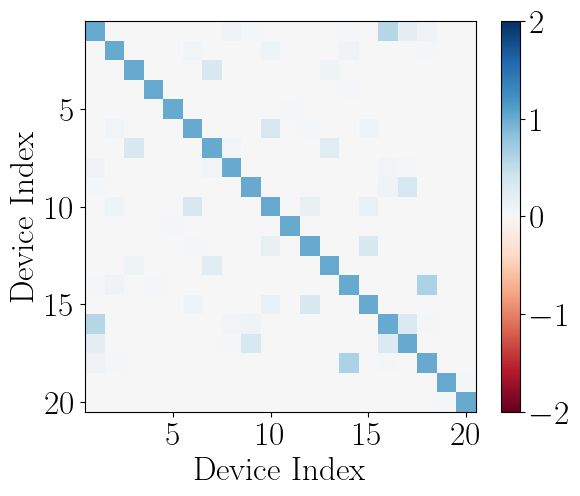

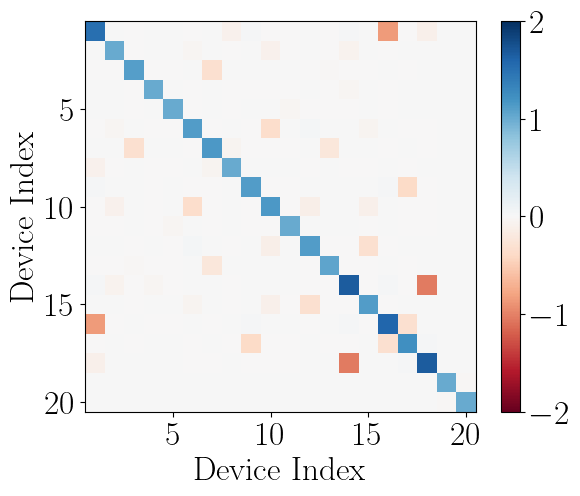

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = np.maximum((np.exp(-distance_matrix / kappa) - np.exp(-D / kappa)) / (1 - np.exp(-D / kappa)), 0)

# Compute inverse correlation matrix using pseudo-inverse
inverse_correlation_matrix = np.linalg.pinv(correlation_matrix)

# Define tick positions (0-based indexing but labeled as 1-based)
tick_positions = np.arange(4, 20, 5)  # Positions at 4, 9, 14, 19
tick_labels = tick_positions + 1  # Labels start from 1 instead of 0

plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True

# **Plot Correlation Matrix**
plt.figure(figsize=(6, 5))
cax1 = plt.imshow(correlation_matrix, cmap='RdBu', interpolation='nearest', vmin=-2, vmax=2)
cbar1 = plt.colorbar(cax1)
cbar1.ax.tick_params(labelsize=24)  # Adjust font size of colorbar ticks
plt.xticks(tick_positions, tick_labels, fontsize=24)
plt.yticks(tick_positions, tick_labels, fontsize=24)
plt.xlabel('Device Index', fontsize=24)
plt.ylabel('Device Index', fontsize=24)

# Save the correlation matrix figure with high DPI
plt.tight_layout()
plt.savefig(f'{base_path}/correlation_matrices/figures/correlation_matrix.eps', format='eps', bbox_inches='tight', dpi=300)

# **Plot Inverse Correlation Matrix**
plt.figure(figsize=(6, 5))
cax2 = plt.imshow(inverse_correlation_matrix, cmap='RdBu', interpolation='nearest', vmin=-2, vmax=2)
cbar2 = plt.colorbar(cax2)
cbar2.ax.tick_params(labelsize=24)  # Adjust font size of colorbar ticks
plt.xticks(tick_positions, tick_labels, fontsize=24)
plt.yticks(tick_positions, tick_labels, fontsize=24)
plt.xlabel('Device Index', fontsize=24)
plt.ylabel('Device Index', fontsize=24)

# Save the inverse correlation matrix figure with high DPI
plt.tight_layout()
plt.savefig(f'{base_path}/correlation_matrices/figures/inverse_covariance_matrix.eps', format='eps', bbox_inches='tight', dpi=300)

# Show the plots
plt.show()
plt.close()


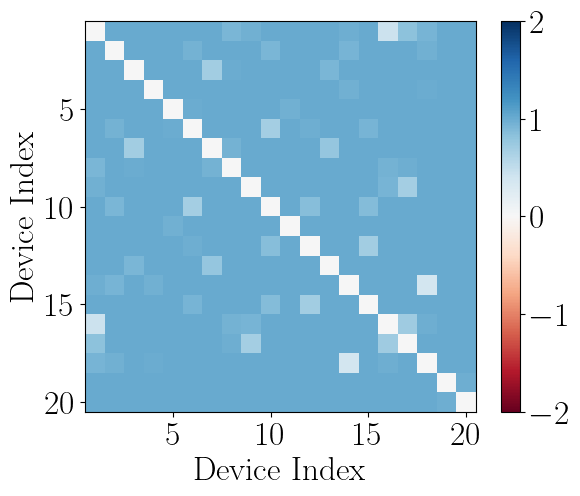

In [12]:
alpha = 1
beta = 1
anc_matrix = alpha * (beta - np.maximum((np.exp(-distance_matrix / kappa) - np.exp(-D / kappa)) / (1 - np.exp(-D / kappa)),0))

plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True

# **Plot Correlation Matrix**
plt.figure(figsize=(6, 5))
cax1 = plt.imshow(anc_matrix, cmap='RdBu', interpolation='nearest', vmin=-2, vmax=2)
cbar1 = plt.colorbar(cax1)
cbar1.ax.tick_params(labelsize=24)  # Adjust font size of colorbar ticks
plt.xticks(tick_positions, tick_labels, fontsize=24)
plt.yticks(tick_positions, tick_labels, fontsize=24)
plt.xlabel('Device Index', fontsize=24)
plt.ylabel('Device Index', fontsize=24)

# Save the correlation matrix figure with high DPI
plt.tight_layout()
plt.savefig(f'{base_path}/correlation_matrices/figures/anc_alpha_1_0_beta_1_0_matrix.eps', format='eps', bbox_inches='tight', dpi=300)


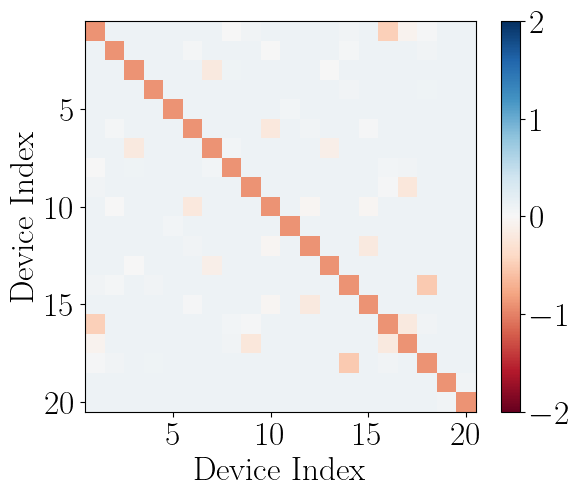

In [13]:
alpha = 1
beta = 0.1
anc_matrix = alpha * (beta - np.maximum((np.exp(-distance_matrix / kappa) - np.exp(-D / kappa)) / (1 - np.exp(-D / kappa)),0))

plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True

# **Plot Correlation Matrix**
plt.figure(figsize=(6, 5))
cax1 = plt.imshow(anc_matrix, cmap='RdBu', interpolation='nearest', vmin=-2, vmax=2)
cbar1 = plt.colorbar(cax1)
cbar1.ax.tick_params(labelsize=24)  # Adjust font size of colorbar ticks
plt.xticks(tick_positions, tick_labels, fontsize=24)
plt.yticks(tick_positions, tick_labels, fontsize=24)
plt.xlabel('Device Index', fontsize=24)
plt.ylabel('Device Index', fontsize=24)

# Save the correlation matrix figure with high DPI
plt.tight_layout()
plt.savefig(f'{base_path}/correlation_matrices/figures/anc_alpha_1_0_beta_0_1_matrix.eps', format='eps', bbox_inches='tight', dpi=300)


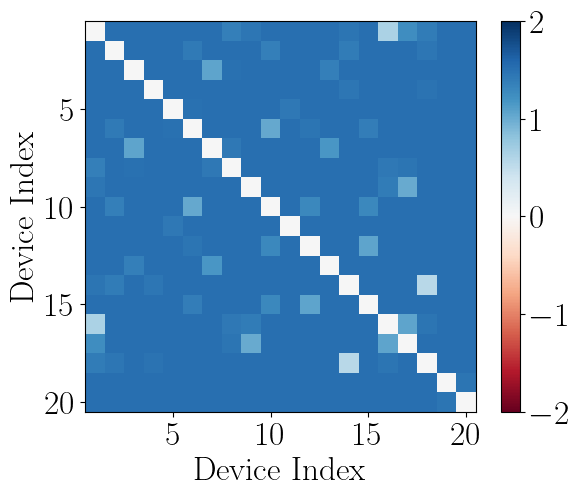

In [14]:
alpha = 1.5
beta = 1
anc_matrix = alpha * (beta - np.maximum((np.exp(-distance_matrix / kappa) - np.exp(-D / kappa)) / (1 - np.exp(-D / kappa)),0))

plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True

# **Plot Correlation Matrix**
plt.figure(figsize=(6, 5))
cax1 = plt.imshow(anc_matrix, cmap='RdBu', interpolation='nearest', vmin=-2, vmax=2)
cbar1 = plt.colorbar(cax1)
cbar1.ax.tick_params(labelsize=24)  # Adjust font size of colorbar ticks
plt.xticks(tick_positions, tick_labels, fontsize=24)
plt.yticks(tick_positions, tick_labels, fontsize=24)
plt.xlabel('Device Index', fontsize=24)
plt.ylabel('Device Index', fontsize=24)

# Save the correlation matrix figure with high DPI
plt.tight_layout()
plt.savefig(f'{base_path}/correlation_matrices/figures/anc_alpha_1_5_beta_1_0_matrix.eps', format='eps', bbox_inches='tight', dpi=300)


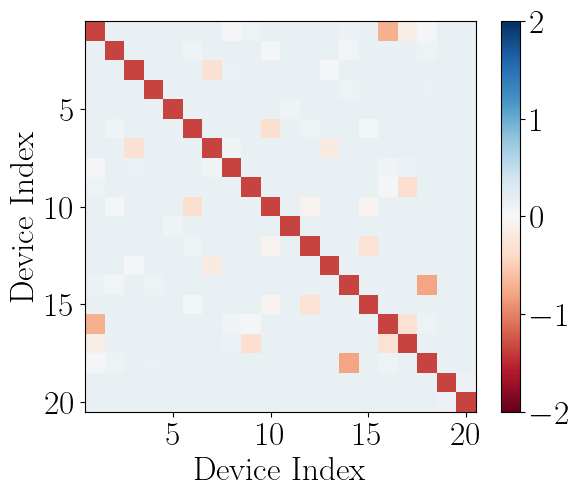

In [15]:
alpha = 1.5
beta = 0.1
anc_matrix = alpha * (beta - np.maximum((np.exp(-distance_matrix / kappa) - np.exp(-D / kappa)) / (1 - np.exp(-D / kappa)),0))

plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True

# **Plot Correlation Matrix**
plt.figure(figsize=(6, 5))
cax1 = plt.imshow(anc_matrix, cmap='RdBu', interpolation='nearest', vmin=-2, vmax=2)
cbar1 = plt.colorbar(cax1)
cbar1.ax.tick_params(labelsize=24)  # Adjust font size of colorbar ticks
plt.xticks(tick_positions, tick_labels, fontsize=24)
plt.yticks(tick_positions, tick_labels, fontsize=24)
plt.xlabel('Device Index', fontsize=24)
plt.ylabel('Device Index', fontsize=24)

# Save the correlation matrix figure with high DPI
plt.tight_layout()
plt.savefig(f'{base_path}/correlation_matrices/figures/anc_alpha_1_5_beta_0_1_matrix.eps', format='eps', bbox_inches='tight', dpi=300)
